In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/elephant/elephant.jfif
/kaggle/input/download1/download.jfif
/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. What is Transfer learning:

<font color ="blue">
Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify racoons may be useful to kick-start a model meant to identify tanukis.

Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

<font color ="blue">
A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

<font color ="red">
1. Feature Extraction: Use the representations learned by a previous network to extract meaningful features from new samples. You simply add a new classifier, which will be trained from scratch, on top of the pretrained model so that you can repurpose the feature maps learned previously for the dataset.

You do not need to (re)train the entire model. The base convolutional network already contains features that are generically useful for classifying pictures. However, the final, classification part of the pretrained model is specific to the original classification task, and subsequently specific to the set of classes on which the model was trained.

<font color ="red">
2. Fine-Tuning: Unfreeze a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model. This allows us to "fine-tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task.

<font color ="green">
You will follow the general machine learning workflow.

1. Take layers from a previously trained model.
    
2. Freeze them, so as to avoid destroying any of the information they contain during future training rounds.

3. Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.

4. Train the new layers on your dataset.



## 1. Using Transfer Learning Without Using Our Own Layers

## Examples from Resnet50:

<font color="blue">
ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

         ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, **kwargs)

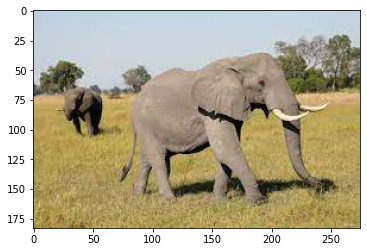

In [3]:
plt.imshow(plt.imread("../input/elephant/elephant.jfif"))
# We have this image and without training our model, we will transfer reshnet50

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '../input/elephant/elephant.jfif'
img = image.load_img(img_path, target_size=(224, 224))
# we convert imgae into 224*224 because resnet has this size of images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n01871265', 'tusker', 0.5553246), ('n02504458', 'African_elephant', 0.37550497), ('n02504013', 'Indian_elephant', 0.0690713)]


In [5]:
preds.size

1000

In [6]:
decode_predictions(preds)

[[('n01871265', 'tusker', 0.5553246),
  ('n02504458', 'African_elephant', 0.37550497),
  ('n02504013', 'Indian_elephant', 0.0690713),
  ('n02437312', 'Arabian_camel', 4.4417153e-05),
  ('n02397096', 'warthog', 1.7997296e-05)]]

<font color="red">
Predicted: [('n01871265', 'tusker', 0.5553246), ('n02504458', 'African_elephant', 0.37550497), ('n02504013', 'Indian_elephant', 0.0690713)]

In [7]:
print(f"It is a {decode_predictions(preds)[0][0][1]} with {decode_predictions(preds)[0][0][2]}")

It is a tusker with 0.5553246140480042


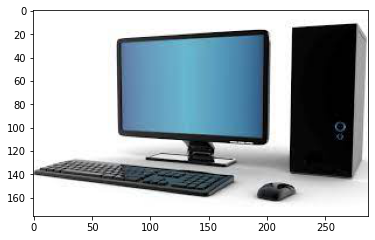

In [8]:
plt.imshow(plt.imread('../input/download1/download.jfif'))



In [9]:
from tensorflow.keras.preprocessing import image
img_path = '../input/download1/download.jfif'
img = image.load_img(img_path, target_size=(224, 224))
# we convert imgae into 224*224 because resnet has this size of images
x = image.img_to_array(img)
print(x)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [10]:
from tensorflow.keras.preprocessing import image
img_path = '../input/download1/download.jfif'
img = image.load_img(img_path, target_size=(224, 224))
# we convert imgae into 224*224 because resnet has this size of images
x = image.img_to_array(img)
x= np.expand_dims(x,axis=0)
print(x)

[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]]


In [11]:
from tensorflow.keras.preprocessing import image
img_path = '../input/download1/download.jfif'
img = image.load_img(img_path, target_size=(224, 224))
# we convert imgae into 224*224 because resnet has this size of images
x = image.img_to_array(img)
x= np.expand_dims(x,axis=0)
x= preprocess_input(x)
print(x)

[[[[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  ...

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [1

In [12]:
from tensorflow.keras.preprocessing import image
img_path = '../input/download1/download.jfif'
img = image.load_img(img_path, target_size=(224, 224))
# we convert imgae into 224*224 because resnet has this size of images
x = image.img_to_array(img)
x= np.expand_dims(x,axis=0)
x= preprocess_input(x)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
#The model truely predict the image as desktop computer with %96 chance

Predicted: [('n03180011', 'desktop_computer', 0.9606544), ('n03782006', 'monitor', 0.01795408), ('n04152593', 'screen', 0.017038863)]


## 2. Using Transfer Learning's Trained Convolutions and Adding Our Own Layers

## An Example From InceptionV3

<font color ="blue">
tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

1. First, instantiate a base model with pre-trained weights.

In [13]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),#we can specify the inpur shape with this parameter
    include_top=False) # Do not include the ImageNet classifier at the top.

87916544/87910968 [==============================] - 1s 0us/step


2. Then, freeze the base model.

In [14]:
base_model.trainable = False # We freeze the training of the convolutions

<font color="blue">
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all of them.

3. Create a new model on top.

In [15]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
base = base_model.output
# Flatten the output layer to 1 dimension
model = Flatten()(base)



In [16]:

# Add a fully connected layer with 1,024 hidden units and ReLU activation
model = Dense(units=1024, activation ="relu")(model)
# Add a dropout rate of 0.2
model = Dropout(0.2)(model)
# Add a final sigmoid layer for classification
model = Dense(units = 1, activation = "sigmoid")(model)
model = Model( base_model.input, model)
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
import zipfile
local_zip = "../input/dogs-vs-cats-redux-kernels-edition/train.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/kaggle/working/')
zip_ref.close()

In [19]:
base_dir = '/kaggle/working/'
train_dir = os.path.join(base_dir, 'train')
train_img_names = os.listdir(train_dir)

In [20]:
local_zip = "../input/dogs-vs-cats-redux-kernels-edition/test.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/kaggle/working/')
zip_ref.close()

In [21]:
base_dir = '/kaggle/working/'
test_dir = os.path.join(base_dir, 'test')
test_img_names = os.listdir(test_dir)

In [22]:
print(train_img_names[:10])

['cat.11092.jpg', 'cat.8181.jpg', 'cat.1465.jpg', 'dog.1962.jpg', 'dog.10252.jpg', 'cat.8598.jpg', 'cat.6490.jpg', 'dog.7577.jpg', 'dog.9474.jpg', 'cat.1090.jpg']


In [23]:
print(test_img_names[:10])

['6671.jpg', '3748.jpg', '5148.jpg', '10404.jpg', '11970.jpg', '5054.jpg', '1643.jpg', '9604.jpg', '8468.jpg', '9881.jpg']


In [24]:
print('total training images :', len(train_img_names ))

total training images : 25000


In [25]:
print('total training images :', len(test_img_names ))

total training images : 12500


Lets separate  dogs and cats for  dataset

In [26]:
categories = list()
for image in train_img_names:
    categories.append(image[:3])
categories[:10]


['cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat']

In [27]:
df = pd.DataFrame({"Image":train_img_names, "Category": categories})
df.head()

,Image,Category
0,cat.11092.jpg,cat
1,cat.8181.jpg,cat
2,cat.1465.jpg,cat
3,dog.1962.jpg,dog
4,dog.10252.jpg,dog


<AxesSubplot:xlabel='Category', ylabel='count'>

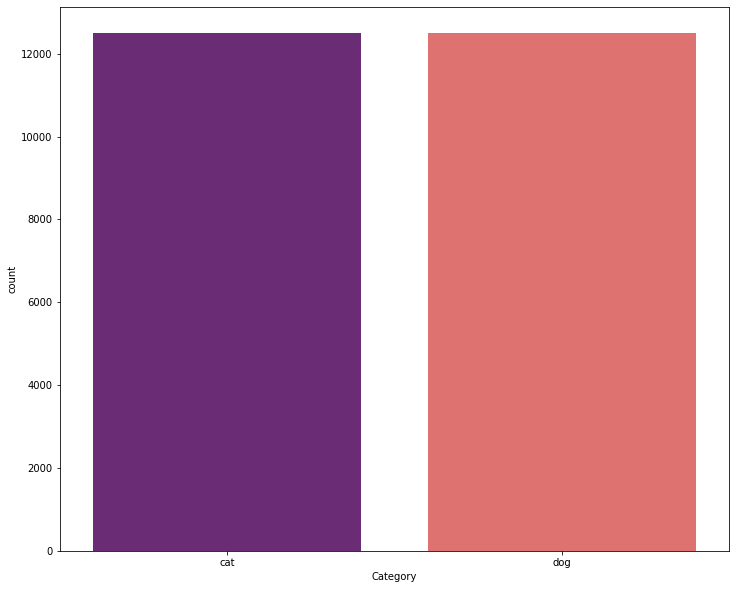

In [28]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x="Category",palette="magma")

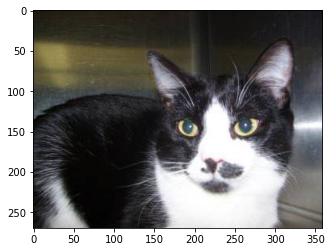

In [29]:
import random
sample = random.choice(train_img_names)
plt.imshow(plt.imread(("/kaggle/working/train/"+sample)))

In [30]:
from sklearn.model_selection import train_test_split
train,validation= train_test_split(df, test_size=0.1)
train = train.reset_index(drop=True)
validation = validation.reset_index(drop=True)

In [31]:
print(train.shape)
print(validation.shape)

(22500, 2)
(2500, 2)


In [32]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_dataframe(train,
                                                    directory="./train",
                                                    x_col='Image',
                                                    y_col='Category',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 

NameError: name 'ImageDataGenerator' is not defined

In [33]:
# Note that the validation data should not be augmented!
validation_datagen  = ImageDataGenerator( rescale = 1.0/255.)
validation_generator =  validation_datagen.flow_from_dataframe(validation,
                                                            directory="./train",
                                                              x_col='Image',
                                                             y_col='Category',
                                                              batch_size=20,
                                                              class_mode  = 'binary',
                                                              target_size = (150, 150))

NameError: name 'ImageDataGenerator' is not defined

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor="val_loss", patience=4)
history=model.fit(train_generator, 
                  validation_data=validation_generator,
                  steps_per_epoch = 100,
                  epochs=20,
                  validation_steps = 50,
                  callbacks=[callback])

NameError: name 'train_generator' is not defined

In [35]:
sns.set_style("darkgrid")
pd.DataFrame(model.history.history).plot(figsize=(15,10))

AttributeError: 'NoneType' object has no attribute 'history'

<font color="blue">
